### Stock price history of two media companies in S&P 500: 
#### Netflix (NFLX) and The Walt Disney Company (DIS)

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime 
#https://towardsdatascience.com/downloading-historical-stock-prices-in-python-93f85f059c1f

In [9]:
start = datetime(2021,11,18)
end = datetime(2022,11,18)

### Netflix

In [35]:
nflx_final = pd.DataFrame()
nflx = []
nflx = yf.download('NFLX', start=start, end=end, progress=False)
nflx_final = nflx_final.append(nflx,sort=False)
nflx_final

C:\Users\anush\AppData\Local\Temp\ipykernel_12800\2237142170.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nflx_final = nflx_final.append(nflx,sort=False)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-18,691.609985,691.739990,679.739990,682.020020,682.020020,2012900
2021-11-19,692.349976,694.159973,675.000000,678.799988,678.799988,2613700
2021-11-22,676.020020,679.479980,656.469971,659.200012,659.200012,2764400
2021-11-23,658.179993,666.429993,646.049988,654.059998,654.059998,2320200
2021-11-24,658.010010,661.440002,651.099976,658.289978,658.289978,1867300
...,...,...,...,...,...,...
2022-11-11,274.470001,290.660004,271.559998,290.130005,290.130005,9567300
2022-11-14,290.000000,311.000000,288.190002,299.269989,299.269989,17978200
2022-11-15,309.200012,312.709991,302.549988,310.200012,310.200012,14626900


### The Walt Disney Company

In [36]:
dis_final = pd.DataFrame()
dis = []
dis = yf.download('DIS', start=start, end=end, progress=False)
dis_final = dis_final.append(dis,sort=False)
dis_final

C:\Users\anush\AppData\Local\Temp\ipykernel_12800\3263549175.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dis_final = dis_final.append(dis,sort=False)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-18,157.089996,157.300003,153.710007,155.580002,155.580002,14487700
2021-11-19,155.020004,155.210007,152.770004,154.000000,154.000000,16776500
2021-11-22,153.229996,155.820007,152.570007,154.160004,154.160004,12790400
2021-11-23,153.839996,154.250000,150.190002,151.029999,151.029999,17382900
2021-11-24,150.690002,151.410004,148.800003,151.339996,151.339996,14123700
...,...,...,...,...,...,...
2022-11-11,91.580002,95.580002,91.099998,95.010002,95.010002,22320900
2022-11-14,95.849998,96.620003,94.209999,94.279999,94.279999,20598000
2022-11-15,96.000000,97.180000,93.699997,95.510002,95.510002,15801900


### Stock price comparison

In [37]:
nflx_vs_dis = pd.DataFrame()
nflx_vs_dis['NFLX_close'] = nflx_final['Close']
nflx_vs_dis['DIS_close'] = dis_final['Close']
nflx_vs_dis

,NFLX_close,DIS_close
Date,,
2021-11-18,682.020020,155.580002
2021-11-19,678.799988,154.000000
2021-11-22,659.200012,154.160004
2021-11-23,654.059998,151.029999
2021-11-24,658.289978,151.339996
...,...,...
2022-11-11,290.130005,95.010002
2022-11-14,299.269989,94.279999
2022-11-15,310.200012,95.510002


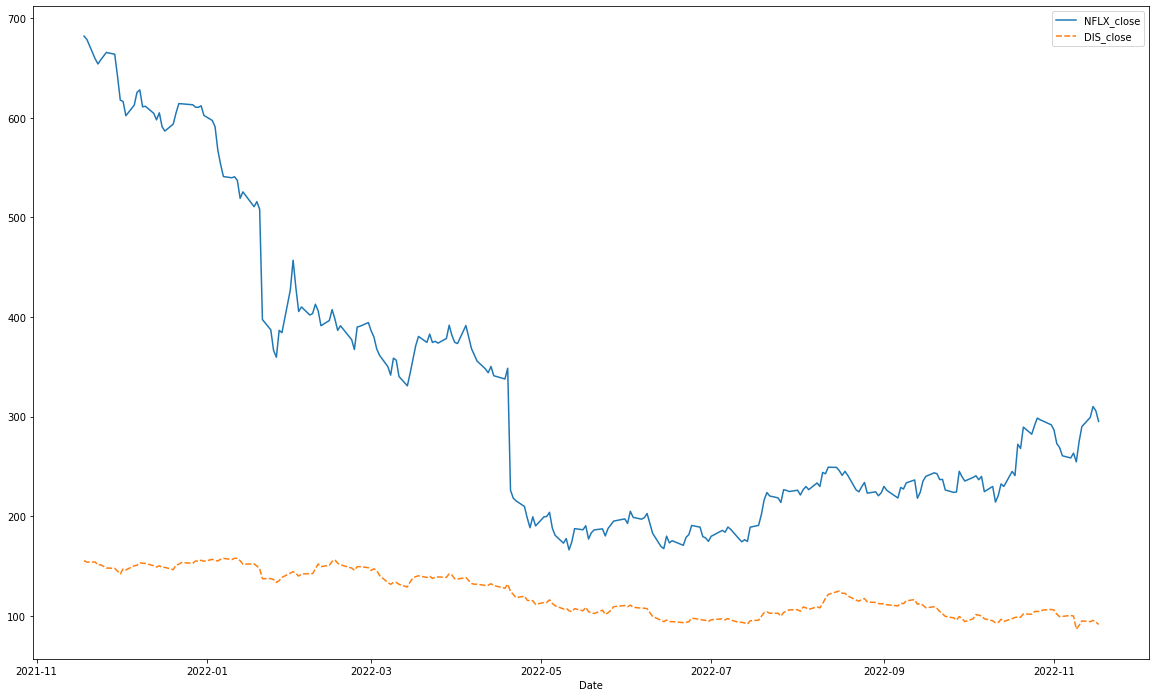

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize = (20,12)) 
sns.lineplot(data = nflx_vs_dis)
plt.show()

### Put option comparison

In [40]:
#NFLX
#Jan 2023 maturity
maturity = '01/20/2023'
maturity = datetime.strptime(maturity, '%m/%d/%Y')

nflx_put = yf.Ticker('NFLX230120C00280000')
nflx_opt = nflx_put.history()
nflx_opt = nflx_opt.reset_index()
nflx_opt['Date'] = pd.to_datetime(nflx_opt['Date']).dt.tz_convert(None)

nflx_opt['toMature'] = maturity -  nflx_opt['Date']
nflx_opt['toMature'] =  nflx_opt['toMature'].dt.days/365.25

nflx_opt

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,toMature
0,2022-10-21 04:00:00,28.000000,40.299999,28.000000,39.150002,27784,0,0,0.246407
1,2022-10-24 04:00:00,39.330002,39.799999,33.700001,35.799999,8393,0,0,0.238193
2,2022-10-25 04:00:00,37.250000,43.200001,36.900002,38.900002,8468,0,0,0.235455
3,2022-10-26 04:00:00,40.799999,47.529999,40.799999,43.180000,2255,0,0,0.232717
4,2022-10-27 04:00:00,45.000000,46.669998,42.500000,45.700001,282,0,0,0.229979
5,2022-10-28 04:00:00,41.290001,41.290001,39.250000,39.750000,399,0,0,0.227242
6,2022-10-31 04:00:00,38.799999,38.799999,36.549999,37.299999,294,0,0,0.219028
7,2022-11-01 04:00:00,39.959999,39.959999,33.250000,33.450001,6704,0,0,0.216290
8,2022-11-02 04:00:00,33.700001,33.700001,25.500000,25.500000,5948,0,0,0.213552
9,2022-11-03 04:00:00,25.219999,26.299999,23.900000,23.900000,1397,0,0,0.210815


In [41]:
#DISNEY
maturity = '01/20/2023'
maturity = datetime.strptime(maturity, '%m/%d/%Y')

dis_put = yf.Ticker('DIS230120C00090000')
dis_opt = dis_put.history()
dis_opt = dis_opt.reset_index()
dis_opt['Date'] = pd.to_datetime(dis_opt['Date']).dt.tz_convert(None)

dis_opt['toMature'] = maturity -  dis_opt['Date']
dis_opt['toMature'] =  dis_opt['toMature'].dt.days/365.25

dis_opt

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,toMature
0,2022-10-21 04:00:00,14.150000,16.350000,13.500000,16.350000,7877,0,0,0.246407
1,2022-10-24 04:00:00,16.400000,17.000000,15.150000,15.650000,432,0,0,0.238193
2,2022-10-25 04:00:00,16.780001,18.129999,16.780001,18.129999,30,0,0,0.235455
3,2022-10-26 04:00:00,19.400000,20.420000,18.700001,19.000000,67,0,0,0.232717
4,2022-10-27 04:00:00,17.750000,17.750000,17.750000,17.750000,1,0,0,0.229979
5,2022-10-28 04:00:00,18.549999,18.950001,18.549999,18.950001,9,0,0,0.227242
6,2022-10-31 04:00:00,19.100000,19.100000,19.100000,19.100000,3,0,0,0.219028
7,2022-11-01 04:00:00,20.850000,20.850000,18.950001,18.950001,36,0,0,0.216290
8,2022-11-03 04:00:00,13.300000,14.100000,13.260000,14.050000,15,0,0,0.210815
9,2022-11-07 05:00:00,13.750000,14.200000,13.500000,14.200000,14,0,0,0.199863


In [42]:
nflx_opt_dis = pd.DataFrame()
nflx_opt_dis['NFLX_close'] = nflx_opt['Close']
nflx_opt_dis['DIS_close'] = dis_opt['Close']
nflx_opt_dis

,NFLX_close,DIS_close
0,39.150002,16.350000
1,35.799999,15.650000
2,38.900002,18.129999
3,43.180000,19.000000
4,45.700001,17.750000
5,39.750000,18.950001
6,37.299999,19.100000
7,33.450001,18.950001
8,25.500000,14.050000
9,23.900000,14.200000


### Options prices

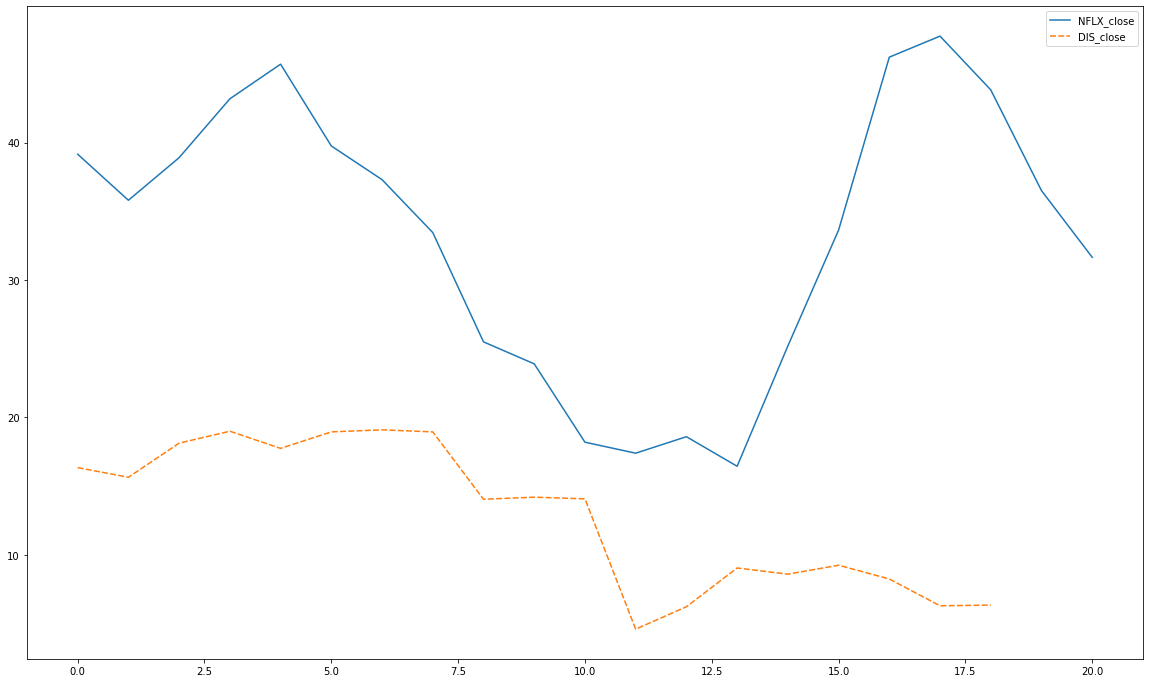

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize = (20,12)) 
sns.lineplot(data = nflx_opt_dis)
plt.show()

### Volume options

In [44]:
opt_vol = pd.DataFrame()
opt_vol['NFLX_volume'] = nflx_opt['Volume']
opt_vol['DIS_volume'] = dis_opt['Volume']
opt_vol

,NFLX_volume,DIS_volume
0,27784,7877.0
1,8393,432.0
2,8468,30.0
3,2255,67.0
4,282,1.0
5,399,9.0
6,294,3.0
7,6704,36.0
8,5948,15.0
9,1397,14.0


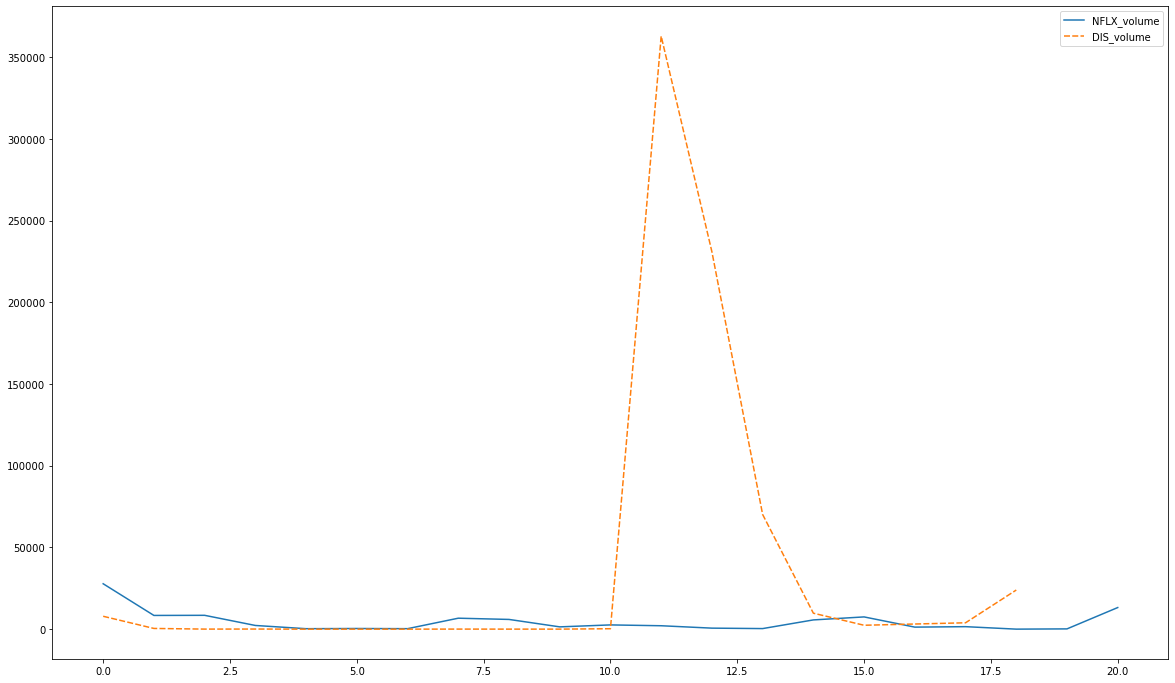

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize = (20,12)) 
sns.lineplot(data = opt_vol)
plt.show()